In [1]:
import numpy
import matplotlib
from matplotlib import pyplot
from matplotlib.lines import Line2D
import os

pyplot.rcParams.update({
  "text.usetex": True,
  "font.family": "Helvetica"
})

In [2]:
output_dir = "paper_plots"

os.makedirs(output_dir, exist_ok=True)

# States with Macroscopy particle imbalance

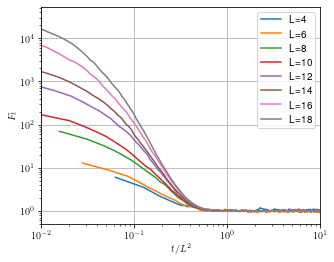

In [3]:
arr = numpy.load(os.path.join("half_filling", "all_defects_left.npz"))
half_filling_left_purities = arr['data']
half_filling_left_ls = arr['ls']
half_filling_left_ds = arr['Ds']

# for d, l, purity in zip(half_filling_left_ds, half_filling_left_ls, half_filling_left_purities):
#     T = len(purity)
#     pyplot.plot(numpy.arange(1,T+1), (purity)/d, label=f"L={l}")
    
# pyplot.xlabel('$t$')
# pyplot.ylabel('$F_t/D$')
# pyplot.yscale('log')
# # pyplot.xscale('log')
# pyplot.xlim([-0.1,50])
# pyplot.legend()
# pyplot.grid()
# pyplot.show()


# for d, l, purity in zip(half_filling_left_ds, half_filling_left_ls, half_filling_left_purities):
#     T = len(purity)
#     pyplot.plot(numpy.arange(1,T+1)/l**2, (purity)/d, label=f"L={l}")
    
# pyplot.xlabel('$t/L^2$')
# pyplot.ylabel('$F_t/D$')
# pyplot.yscale('log')
# pyplot.xscale('log')
# pyplot.legend()
# pyplot.grid()
# pyplot.show()


fig, ax = pyplot.subplots(figsize=[5, 4])

for d, l, purity in zip(half_filling_left_ds, half_filling_left_ls, half_filling_left_purities):
    T = len(purity)
    ax.plot(numpy.arange(1,T+1)/l**2, (purity), label=f"L={l}")
    
ax.set_xlabel('$t/L^2$')
ax.set_ylabel('$F_t$')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim([1e-2,1e1])
# pyplot.ylim([5e-1,1e3])
pyplot.legend()
pyplot.grid()
pyplot.savefig(os.path.join(output_dir, "fig_2b.pdf"))
pyplot.show()


# for d, l, purity in zip(half_filling_left_ds, half_filling_left_ls, half_filling_left_purities):
#     T = len(purity)
#     pyplot.plot(numpy.arange(1,T+1)/l**2, (purity), label=f"L={l}")
    
# pyplot.xlabel('$t/L^2$')
# pyplot.ylabel('$F_t$')
# pyplot.yscale('log')
# # pyplot.xscale('log')
# pyplot.xlim([1e-2,0.5])
# # pyplot.ylim([5e-1,1e3])
# pyplot.legend()
# pyplot.grid()
# pyplot.show()

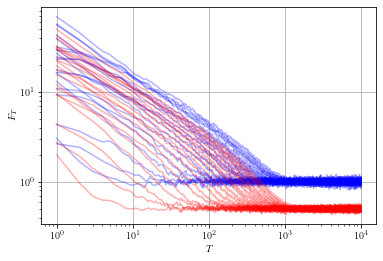

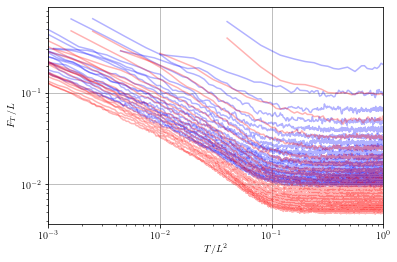

In [4]:
arr = numpy.load(os.path.join("merge_single_double_filling", f'dimer_and_dephased.npz'))
dimer_ls = arr['ls']
dimer_all_purities = arr['data']
dimer_all_mixed_purities = arr['data_mixed']

for l,pur in zip(dimer_ls, dimer_all_purities):
    pyplot.plot(numpy.arange(1,len(pur)+1), pur, c='blue', alpha=0.3)
for l,pur in zip(dimer_ls, dimer_all_mixed_purities):
    pyplot.plot(numpy.arange(1,len(pur)+1), pur, c='red', alpha=0.3)

pyplot.grid()
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.ylabel('$F_T$')
pyplot.xlabel('$T$')
pyplot.show()


for l,pur in zip(dimer_ls, dimer_all_purities):
    pyplot.plot(numpy.arange(1,len(pur)+1)/l**2, pur/l, c='blue', alpha=0.3)
for l,pur in zip(dimer_ls, dimer_all_mixed_purities):
    pyplot.plot(numpy.arange(1,len(pur)+1)/l**2, pur/l, c='red', alpha=0.3)

pyplot.grid()
pyplot.xscale('log')
pyplot.xlim([1e-3, 1])
pyplot.yscale('log')
pyplot.ylabel('$F_T/L$')
pyplot.xlabel('$T/L^2$')
pyplot.show()

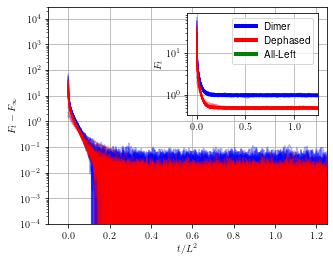

In [5]:
fig, ax = pyplot.subplots(figsize=[5, 4])

for l,pur in zip(dimer_ls, dimer_all_purities):
    ax.plot(numpy.arange(len(pur))/l**2, pur - 1.0, c='blue', alpha=0.3)
for l,pur in zip(dimer_ls, dimer_all_mixed_purities):
    ax.plot(numpy.arange(len(pur))/l**2, pur - 0.5, c='red', alpha=0.3)

# for l, purity in zip(half_filling_left_ls, half_filling_left_purities):
#     ax.plot(numpy.arange(len(purity)) / (l**2), purity - 1.0, c='green', alpha=0.5)

ax.set_ylim([1e-4,3e4])
ax.set_xlim([-0.1,1.25])
ax.set_xlabel(r'$t/L^2$')
ax.set_ylabel(r'$F_t - F_\infty$')
ax.set_yscale('log')
# pyplot.xscale('log')
ax.grid()

axins = ax.inset_axes([0.5, 0.5, 0.47, 0.47])
for l,pur in zip(dimer_ls, dimer_all_purities):
    axins.plot(numpy.arange(len(pur))/l**2, pur, c='blue', alpha=0.3)
for l,pur in zip(dimer_ls, dimer_all_mixed_purities):
    axins.plot(numpy.arange(len(pur))/l**2, pur, c='red', alpha=0.3)

# for l, purity in zip(half_filling_left_ls, half_filling_left_purities):
#     axins.plot(numpy.arange(len(purity)) / (l**2), purity, c='green', alpha=0.5)

axins.set_yscale('log')
axins.set_xlim([-0.1,1.25])
axins.set_ylabel(r'$F_t$')
axins.grid()
    
custom_lines = [Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='red', lw=4),
                Line2D([0], [0], color='green', lw=4)]
axins.legend(custom_lines, ['Dimer', 'Dephased', 'All-Left'])
    
pyplot.savefig(os.path.join(output_dir, 'fig_2.pdf'))
pyplot.show()

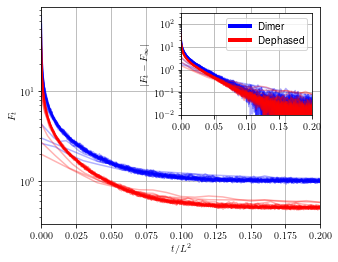

In [15]:
exp = 2
fig, ax = pyplot.subplots(figsize=[5, 4])
axins = ax.inset_axes([0.5, 0.5, 0.47, 0.47])

ax, axins = axins, ax

for l,pur in zip(dimer_ls, dimer_all_purities):
    ax.plot(numpy.arange(len(pur))/l**exp, numpy.abs(pur - 1.0), c='blue', alpha=0.3)
for l,pur in zip(dimer_ls, dimer_all_mixed_purities):
    ax.plot(numpy.arange(len(pur))/l**exp, numpy.abs(pur - 0.5), c='red', alpha=0.3)

# for l, purity in zip(half_filling_left_ls, half_filling_left_purities):
#     ax.plot(numpy.arange(len(purity)) / (l**2), numpy.abs(purity - 1.0), c='green', alpha=0.5)

ax.set_ylim([1e-2,3e2])
ax.set_xlim([0.0,0.2])
ax.set_ylabel(r'$\vert F_t - F_\infty \vert$')
ax.set_yscale('log')
# pyplot.xscale('log')
ax.grid()

for l,pur in zip(dimer_ls, dimer_all_purities):
    axins.plot(numpy.arange(len(pur))/l**exp, pur, c='blue', alpha=0.3)
for l,pur in zip(dimer_ls, dimer_all_mixed_purities):
    axins.plot(numpy.arange(len(pur))/l**exp, pur, c='red', alpha=0.3)

# for l, purity in zip(half_filling_left_ls, half_filling_left_purities):
#     axins.plot(numpy.arange(len(purity)) / (l**2), purity, c='green', alpha=0.5)

axins.set_yscale('log')
axins.set_xlim([-0.0,0.2])
axins.set_ylabel(r'$F_t$')
axins.grid()
    

custom_lines = [Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='red', lw=4)]
                #Line2D([0], [0], color='green', lw=4)]
ax.legend(custom_lines, ['Dimer', 'Dephased'])#, 'All-Left'])

axins.set_xlabel(r'$t/L^2$')

pyplot.savefig(os.path.join(output_dir, 'fig_2_abs.pdf'))
pyplot.show()

# Variance Plots

In [7]:
arr = numpy.load(os.path.join("neelstate_and_density_variance", "neel_state_dens_var.npz"))
neel_ls = arr['ls']
neel_purities = arr['data']
neel_densities = arr['dens']
neel_variances = arr['var']
neel_hilbert_space_sizes = arr['Ds']

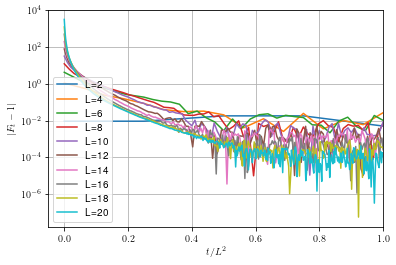

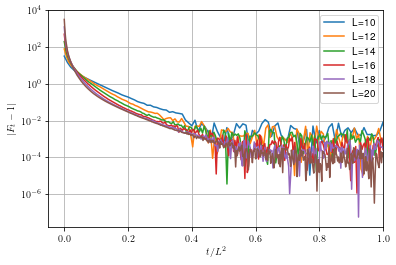

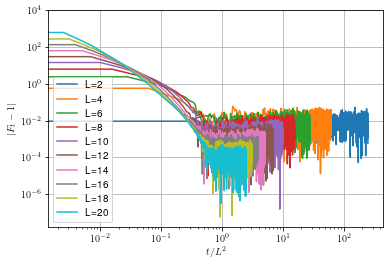

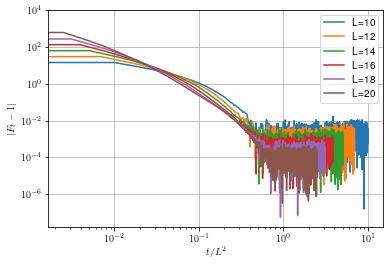

In [8]:
for d, l, purity in zip(neel_hilbert_space_sizes, neel_ls, neel_purities):
    pyplot.plot(numpy.arange(len(purity))/(l**2), numpy.abs(purity - 1), label=f"L={l}")
    
pyplot.xlabel('$t/L^2$')
pyplot.ylabel(r'$\vert F_t - 1\vert $')
# pyplot.xscale('log')
pyplot.yscale('log')
pyplot.xlim([-0.05,1e0])
pyplot.legend()
pyplot.grid()
pyplot.show()

for d, l, purity in zip(neel_hilbert_space_sizes[4:], neel_ls[4:], neel_purities[4:]):
    pyplot.plot(numpy.arange(len(purity))/(l**2), numpy.abs(purity - 1), label=f"L={l}")
    
pyplot.xlabel('$t/L^2$')
pyplot.ylabel(r'$\vert  F_t - 1\vert $')
# pyplot.xscale('log')
pyplot.yscale('log')
pyplot.xlim([-0.05,1e0])
pyplot.legend()
pyplot.grid()
pyplot.show()

for d, l, purity in zip(neel_hilbert_space_sizes, neel_ls, neel_purities):
    pyplot.plot(numpy.arange(len(purity))/(l**2), numpy.abs(purity - 1), label=f"L={l}")
    
pyplot.xlabel('$t/L^2$')
pyplot.ylabel(r'$\vert F_t - 1\vert $')
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.legend()
pyplot.grid()
pyplot.show()

for d, l, purity in zip(neel_hilbert_space_sizes[4:], neel_ls[4:], neel_purities[4:]):
    pyplot.plot(numpy.arange(len(purity))/(l**2), numpy.abs(purity - 1), label=f"L={l}")
    
pyplot.xlabel('$t/L^2$')
pyplot.ylabel(r'$\vert F_t - 1\vert $')
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.legend()
pyplot.grid()
pyplot.show()

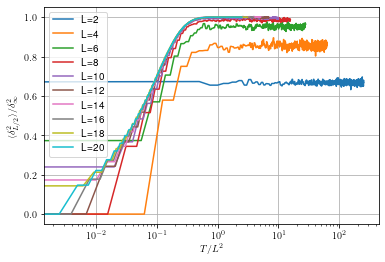

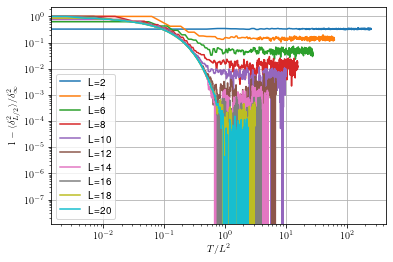

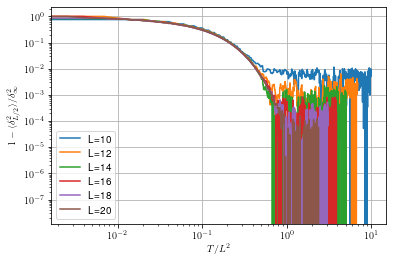

In [9]:
for l,v in zip(neel_ls, neel_variances):
    pyplot.plot(numpy.arange(len(v))/l**2, v/(l**2 / (16 * (l-1))), label=f'L={l}')
pyplot.legend()
pyplot.ylabel(r'$\langle \delta_{L/2}^2 \rangle / \delta_\infty^2$')
pyplot.xlabel(r'$T / L^2$')
pyplot.xscale('log')
pyplot.grid()
pyplot.show()

for l,v in zip(neel_ls, neel_variances):
    pyplot.plot(numpy.arange(len(v))/l**2, 1.0 - v/(l**2 / (16 * (l-1))), label=f'L={l}')
pyplot.legend()
pyplot.ylabel(r'$1 - \langle \delta_{L/2}^2 \rangle / \delta_\infty^2$')
pyplot.xlabel(r'$T / L^2$')
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.grid()
pyplot.show()

for l,v in zip(neel_ls[4:], neel_variances[4:]):
    pyplot.plot(numpy.arange(len(v))/l**2, 1.0 - v/(l**2 / (16 * (l-1))), label=f'L={l}')
pyplot.legend()
pyplot.ylabel(r'$1 - \langle \delta_{L/2}^2 \rangle / \delta_\infty^2$')
pyplot.xlabel(r'$T / L^2$')
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.grid()
pyplot.show()

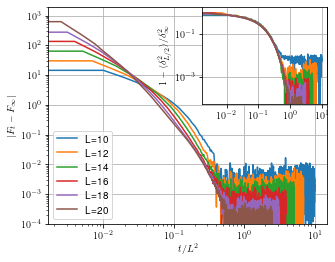

In [10]:
fig, ax = pyplot.subplots(figsize=[5, 4])
axins = ax.inset_axes([0.55, 0.55, 0.45, 0.45])

for d, l, purity in zip(neel_hilbert_space_sizes[4:], neel_ls[4:], neel_purities[4:]):
    ax.plot(numpy.arange(len(purity))/(l**2), numpy.abs(purity - 1), label=f"L={l}")

ax.set_ylabel(r'$\vert F_t - F_\infty \vert$')
ax.set_xlabel(r'$t/L^2$')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim([1e-4,2e3])
ax.grid()

for l,v in zip(neel_ls[4:], neel_variances[4:]):
    axins.plot(numpy.arange(len(v))/l**2, 1.0 - v/(l**2 / (16 * (l-1))), label=f'L={l}')

# for l, purity in zip(half_filling_left_ls, half_filling_left_purities):
#     axins.plot(numpy.arange(len(purity)) / (l**2), purity, c='green', alpha=0.5)

axins.set_yscale('log')
axins.set_ylim([5e-5, 2e0])
axins.set_ylabel(r'$1 - \langle \delta_{L/2}^2 \rangle / \delta_\infty^2$')
axins.set_xscale('log')
axins.set_yscale('log')
axins.set_xticks([1e-2,1e-1,1e0,1e1], minor=False)
axins.grid()

# custom_lines = [Line2D([0], [0], color='blue', lw=4),
#                 Line2D([0], [0], color='red', lw=4)]
#                 #Line2D([0], [0], color='green', lw=4)]
# ax.legend(custom_lines, ['Dimer', 'Dephased'])#, 'All-Left'])

ax.legend(loc='lower left')

pyplot.savefig(os.path.join(output_dir, 'fig_3.pdf'))
pyplot.show()

# Uniform Plot

In [11]:
arr = numpy.load(os.path.join("double_triple_filling", "2_defects_deloc.npz"))
uniform_ls = arr['ls']
uniform_pure_purities = arr['data']
uniform_initial_purities = arr['initial_purities']
uniform_hilbert_space_sizes = arr['Ds']

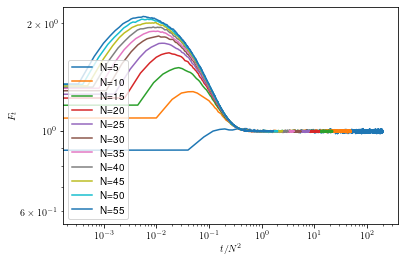

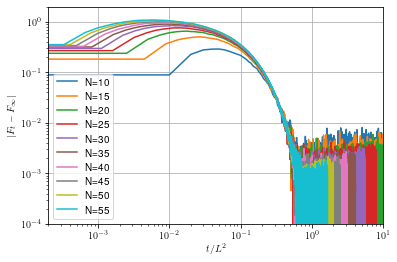

In [12]:
for n, purity in zip(uniform_ls, uniform_pure_purities):
    l = len(purity)
    pyplot.plot(numpy.arange(l)/(n**2), purity, label=f"N={n}")
    
pyplot.xlabel('$t/N^2$')
pyplot.ylabel('$F_t$')
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.legend()
pyplot.show()

for n, purity in zip(uniform_ls[1:], uniform_pure_purities[1:]):
    l = len(purity)
    pyplot.plot(numpy.arange(l)/(n**2), numpy.abs(purity - 1), label=f"N={n}")
    
pyplot.xlabel('$t/L^2$')
pyplot.ylabel(r'$\vert F_t - F_\infty \vert$')
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.ylim([1e-4,2e0])
pyplot.xlim([2e-4,1e1])
pyplot.legend(loc="lower left")
pyplot.grid()
pyplot.show()

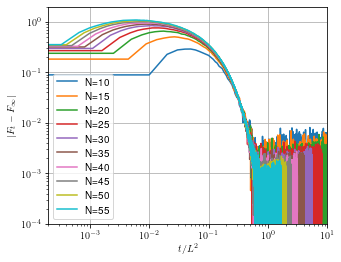

In [13]:
fig, ax = pyplot.subplots(figsize=[5, 4])

for n, purity in zip(uniform_ls[1:], uniform_pure_purities[1:]):
    l = len(purity)
    pyplot.plot(numpy.arange(l)/(n**2), numpy.abs(purity - 1), label=f"N={n}")
    
ax.set_xlabel('$t/L^2$')
ax.set_ylabel(r'$\vert F_t - F_\infty \vert$')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim([1e-4,2e0])
ax.set_xlim([2e-4,1e1])
ax.legend(loc="lower left")
ax.grid()
pyplot.savefig(os.path.join(output_dir, 'fig_4.pdf'))
pyplot.show()